In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()

In [2]:
df = pd.read_csv("/content/colleges_dataset_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,college_names,acceptance_rate,Est_full_price_22_23,Est_price_with_avg_grant,graduation_rate,early_career_earnings,avg_price_for_low_income_students,sat_act_required,undergrad_enrollment,...,percent_of_need_met,percent_of_students_who_get_merit_grants,avg_merit_grant,avg_time_to_a_degree_years,median_student_debt,percent_earning_more_than_a_high_school_grad,Town,State,median_sat,median_act
0,0,Adelphi University,77.0,67400.0,30300.0,74.0,70100.0,24800.0,No,5170.0,...,62.0,22.0,20530.0,4.2,25000.0,80.0,Garden City,NY,1200.0,26.0
1,1,Agnes Scott College,70.0,63500.0,14400.0,73.0,49300.0,10400.0,No,1010.0,...,85.0,25.0,31390.0,4.1,26750.0,60.0,Decatur,GA,1210.0,26.0
2,2,Albertus Magnus College,82.0,62100.0,30800.0,65.0,52300.0,26300.0,No,1020.0,...,46.0,4.0,21060.0,4.3,30960.0,59.0,New Haven,CT,1210.0,26.0
3,3,Albion College,69.0,70200.0,21200.0,70.0,57500.0,15300.0,No,1510.0,...,91.0,16.0,37120.0,4.2,27000.0,74.0,Albion,MI,1110.0,24.0
4,4,Alcorn State University,39.0,25000.0,15600.0,42.0,34500.0,12600.0,Yes,2480.0,...,20.0,33.0,8210.0,4.3,27000.0,40.0,Alcorn State,MS,960.0,22.0


In [4]:
df.columns

Index(['Unnamed: 0', 'college_names', 'acceptance_rate',
       'Est_full_price_22_23', 'Est_price_with_avg_grant', 'graduation_rate',
       'early_career_earnings', 'avg_price_for_low_income_students',
       'sat_act_required', 'undergrad_enrollment',
       'percent_of_students_with_need_who_get_grants', 'percent_of_need_met',
       'percent_of_students_who_get_merit_grants', 'avg_merit_grant',
       'avg_time_to_a_degree_years', 'median_student_debt',
       'percent_earning_more_than_a_high_school_grad', 'Town', 'State',
       'median_sat', 'median_act'],
      dtype='object')

There are a variety of columns but can be broken down into some general categories:

  1. General College Information:
    - `'college_names', 'undergrad_enrollment', 'Town', 'State', 'sat_act_required', 'median_sat', 'median_act'`
  2. Financials:
    - `'Est_full_price_22_23', 'Est_price_with_avg_grant', 'avg_price_for_low_income_students', 'median_student_debt', 'avg_merit_grant', 'percent_of_students_with_need_who_get_grants', 'percent_of_need_met', 'percent_of_students_who_get_merit_grants'`
  3. Success Metrics
    - `'acceptance_rate', 'graduation_rate', 'early_career_earnings', 'percent_earning_more_than_a_high_school_grad', 'avg_time_to_a_degree_years'`

For an easier time doing visulizations gets create a few charts for each general category!

## General College Information

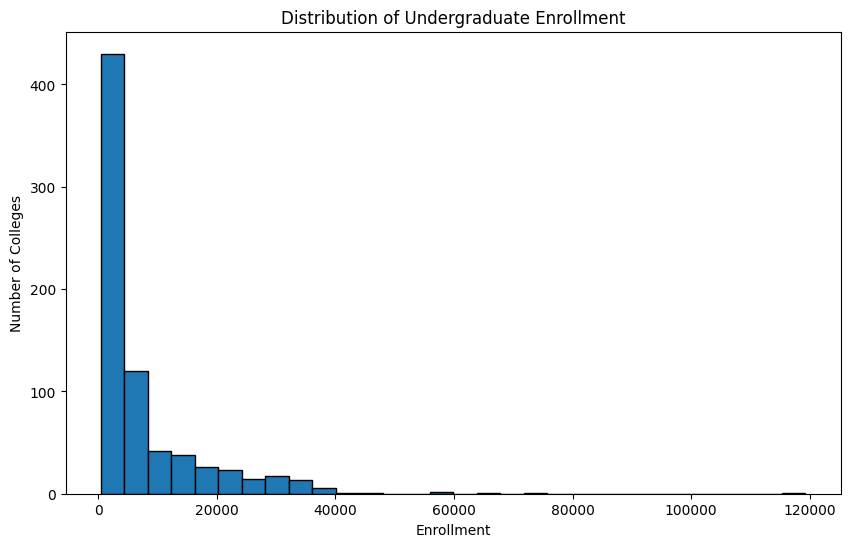

In [66]:
plt.figure(figsize=(10,6))
plt.hist(df['undergrad_enrollment'], bins=30, edgecolor='black')
plt.title('Distribution of Undergraduate Enrollment')
plt.xlabel('Enrollment')
plt.ylabel('Number of Colleges')
plt.show()

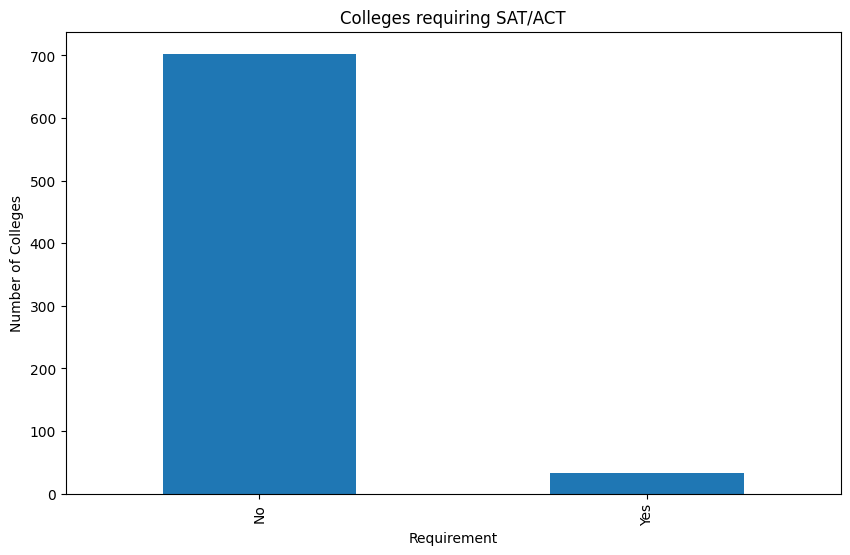

In [7]:
plt.figure(figsize=(10,6))
df['sat_act_required'].value_counts().plot(kind='bar')
plt.title('Colleges requiring SAT/ACT')
plt.xlabel('Requirement')
plt.ylabel('Number of Colleges')
plt.show()

## Financials

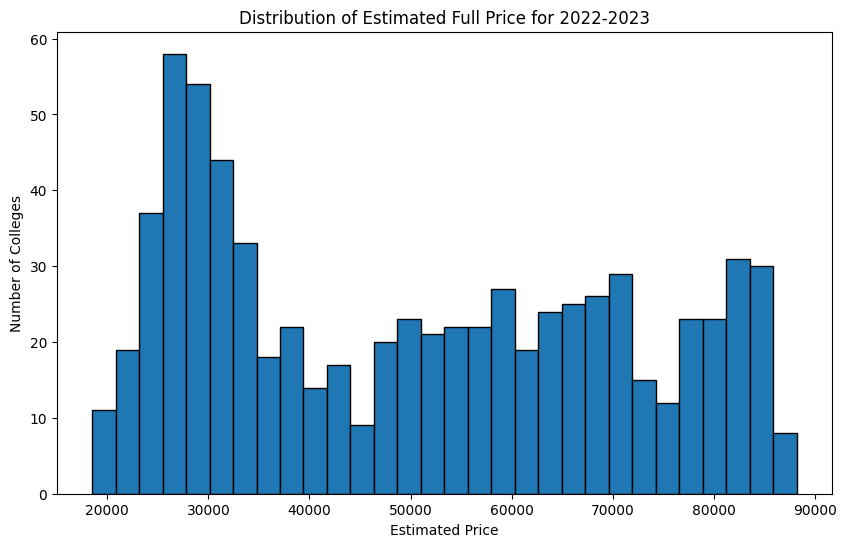

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['Est_full_price_22_23'], bins=30, edgecolor='black')
plt.title('Distribution of Estimated Full Price for 2022-2023')
plt.xlabel('Estimated Price')
plt.ylabel('Number of Colleges')
plt.show()

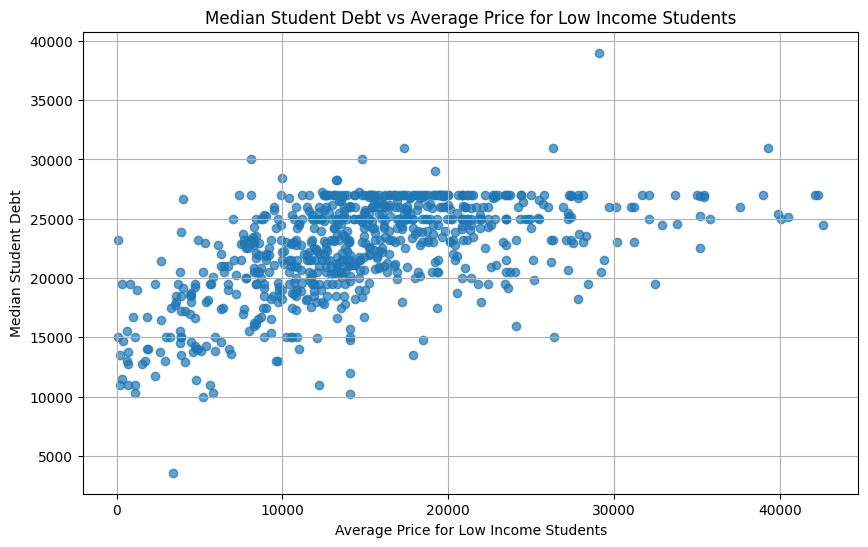

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['avg_price_for_low_income_students'], df['median_student_debt'], alpha=0.7)
plt.title('Median Student Debt vs Average Price for Low Income Students')
plt.xlabel('Average Price for Low Income Students')
plt.ylabel('Median Student Debt')
plt.grid(True)
plt.show()

## Sucess Metrics

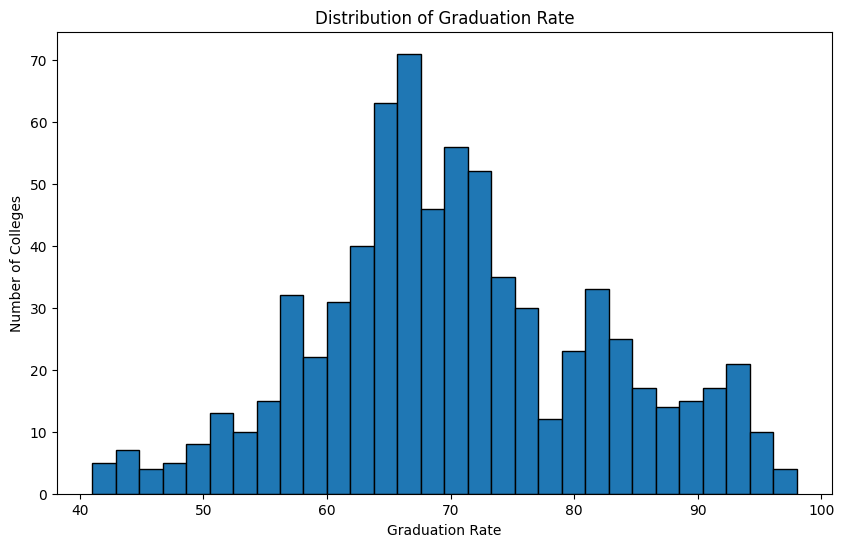

In [51]:
plt.figure(figsize=(10,6))
plt.hist(df['graduation_rate'], bins=30, edgecolor='black')
plt.title('Distribution of Graduation Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Number of Colleges')
plt.show()

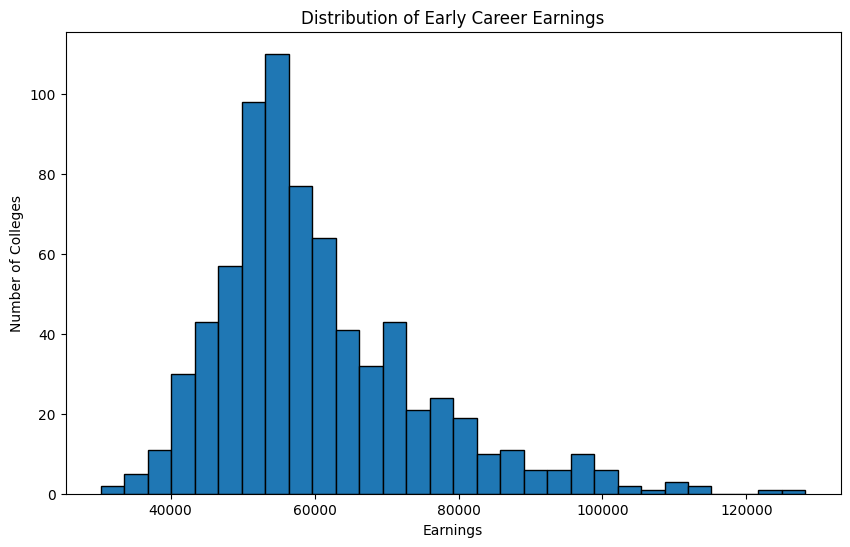

In [59]:
plt.figure(figsize=(10,6))
plt.hist(df['early_career_earnings'], bins=30, edgecolor='black')
plt.title('Distribution of Early Career Earnings')
plt.xlabel('Earnings')
plt.ylabel('Number of Colleges')
plt.show()

##  General College Information (sns)

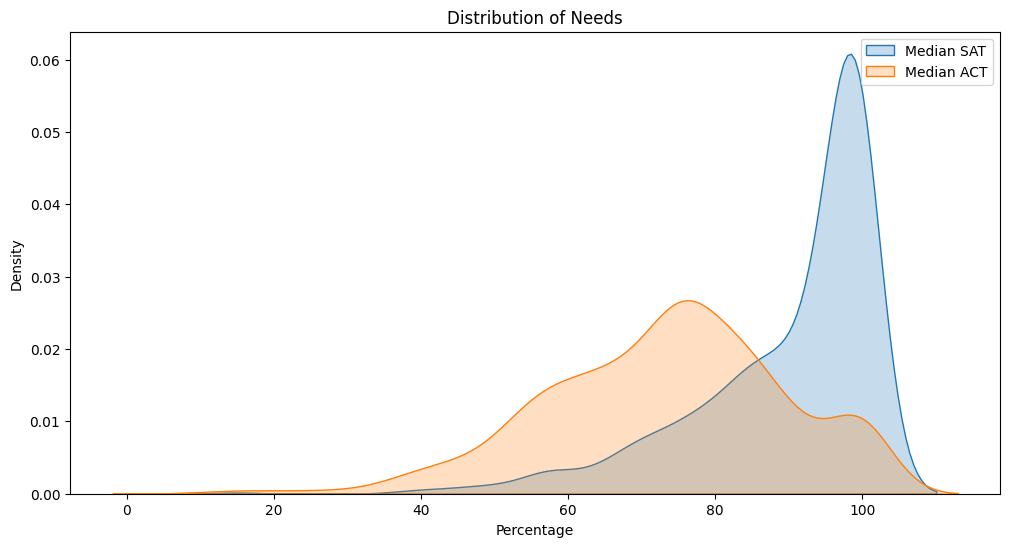

In [64]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['percent_of_students_with_need_who_get_grants'], label='Median SAT', fill=True)
sns.kdeplot(df['percent_of_need_met'], label='Median ACT', fill=True)
plt.title('Distribution of Needs')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.legend()
plt.show()

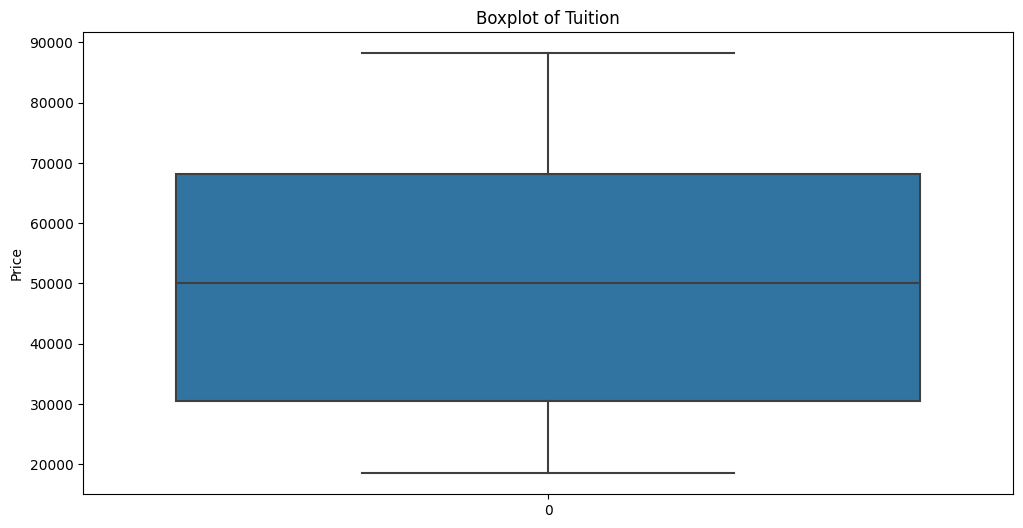

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Est_full_price_22_23'])
plt.title('Boxplot of Tuition')
plt.ylabel('Price')
plt.show()

## Financials (sns)

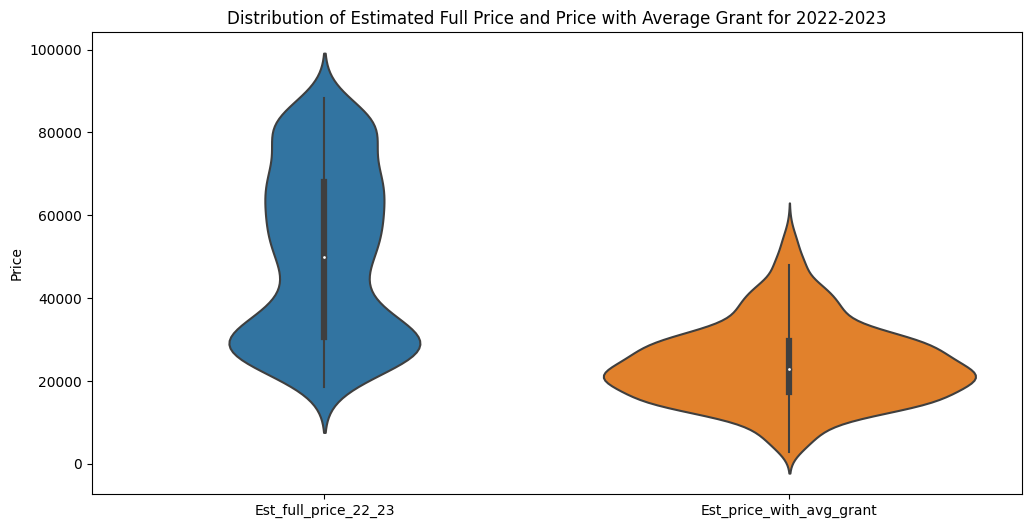

In [24]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df[['Est_full_price_22_23', 'Est_price_with_avg_grant']])
plt.title('Distribution of Estimated Full Price and Price with Average Grant for 2022-2023')
plt.ylabel('Price')
plt.show()

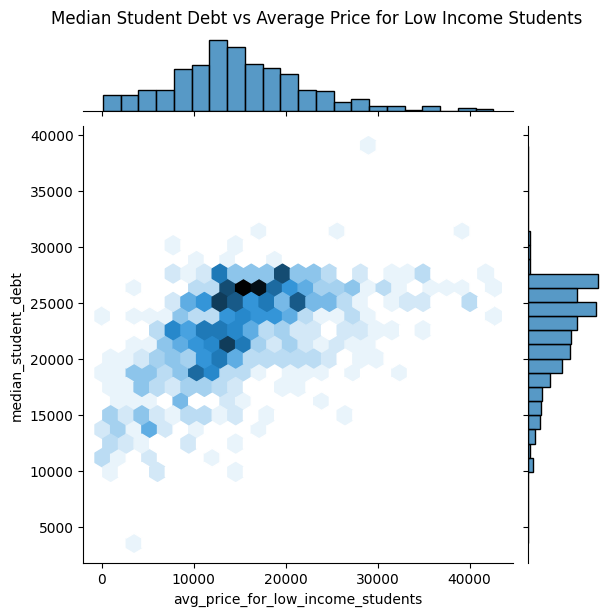

In [25]:
sns.jointplot(x='avg_price_for_low_income_students', y='median_student_debt', data=df, kind='hex')
plt.suptitle('Median Student Debt vs Average Price for Low Income Students', y=1.02)
plt.show()

## Sucess Metrics (sns)

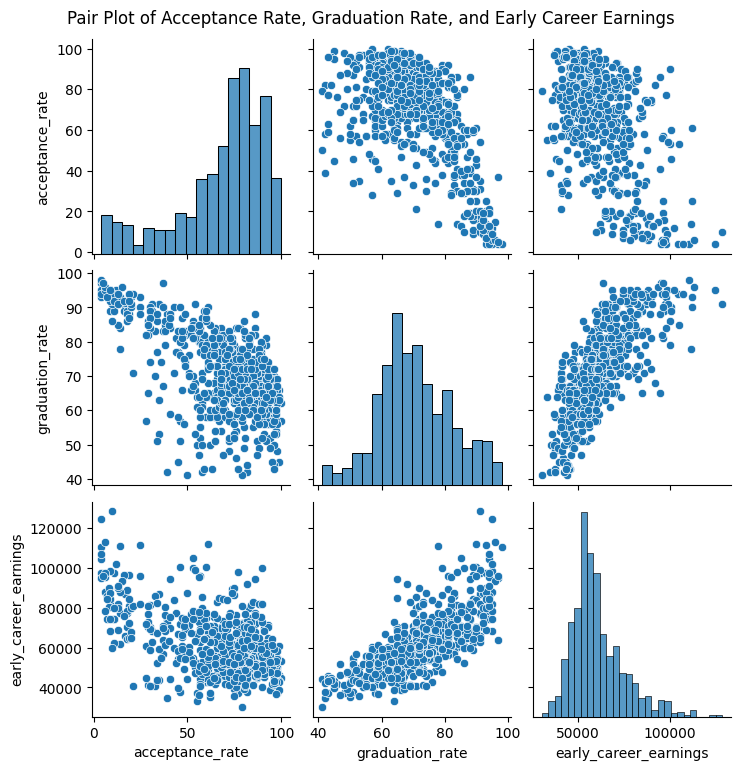

In [26]:
sns.pairplot(df[['acceptance_rate', 'graduation_rate', 'early_career_earnings']])
plt.suptitle('Pair Plot of Acceptance Rate, Graduation Rate, and Early Career Earnings', y=1.02)
plt.show()

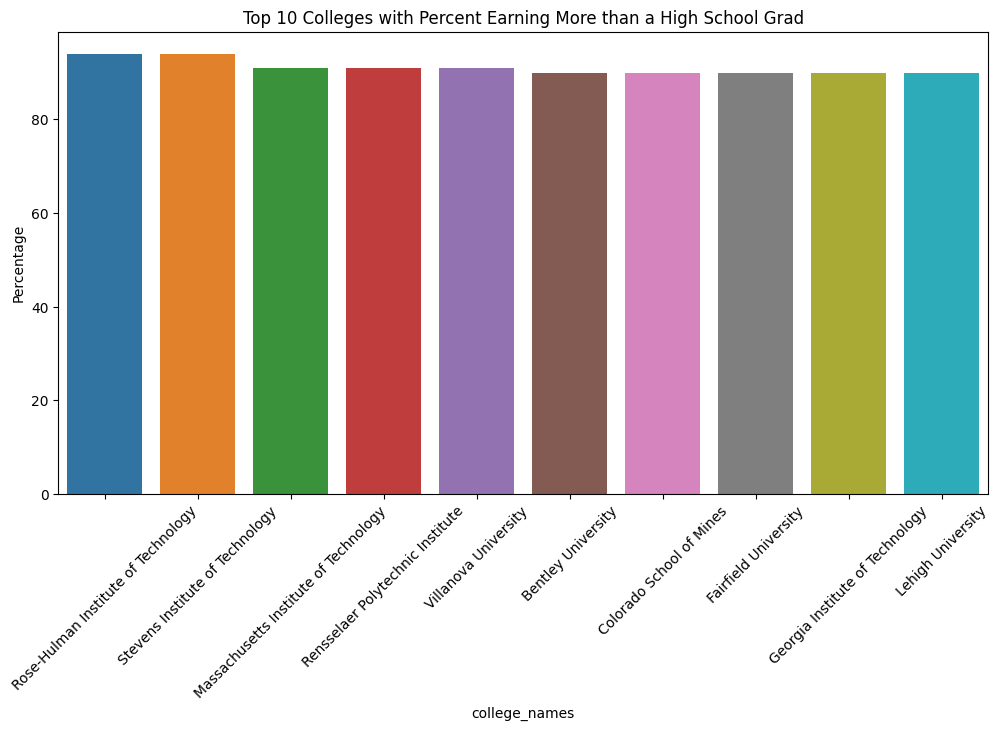

In [31]:
plt.figure(figsize=(12,6))
top_10_colleges = df.nlargest(10, 'percent_earning_more_than_a_high_school_grad')
sns.barplot(x='college_names', y='percent_earning_more_than_a_high_school_grad', data=top_10_colleges)
plt.title('Top 10 Colleges with Percent Earning More than a High School Grad')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.show()

In [44]:
source = ColumnDataSource(data=dict(
    acceptance_rate=df['acceptance_rate'],
    ece=df['early_career_earnings'],
    college=df['college_names']
))

p = figure(height=400, width=600, title="Median Student Debt vs Average Price for Low Income Students",
           tools="pan,box_zoom,reset,save", x_axis_label="Acceptance Rate", y_axis_label="Early Career Earnings")

p.circle('acceptance_rate', 'ece', size=10, color="navy", alpha=0.5, source=source)

hover = HoverTool()
hover.tooltips = [("College", "@college"), ("Acc. Rt.", "@acceptance_rate"), ("Earnings", "@ece")]
p.add_tools(hover)

show(p)

In [35]:
df.columns

Index(['Unnamed: 0', 'college_names', 'acceptance_rate',
       'Est_full_price_22_23', 'Est_price_with_avg_grant', 'graduation_rate',
       'early_career_earnings', 'avg_price_for_low_income_students',
       'sat_act_required', 'undergrad_enrollment',
       'percent_of_students_with_need_who_get_grants', 'percent_of_need_met',
       'percent_of_students_who_get_merit_grants', 'avg_merit_grant',
       'avg_time_to_a_degree_years', 'median_student_debt',
       'percent_earning_more_than_a_high_school_grad', 'Town', 'State',
       'median_sat', 'median_act'],
      dtype='object')